<a href="https://colab.research.google.com/github/Stapleru/ml/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт всего необходимого

In [41]:

import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from sklearn import preprocessing
import random
le = preprocessing.LabelEncoder()

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from datetime import datetime
%matplotlib inline     

#Проверка таблицы

In [42]:
#from google.colab import drive
#drive.mount('/content/drive/')
import os
#os.chdir("/content/drive/My Drive/Colab Notebooks")
pd.set_option('display.max_columns', None)
df = pd.read_csv("../data/Result.csv")

In [43]:
df.head(20)      

,Unnamed: 0,id,premium,name,has_test,response_letter_required,area_id,area_name,salary_to,type_name,address_raw,response_url,sort_point_distance,published_at,created_at,archived,apply_alternate_url,insider_interview,url,alternate_url,relations,employer_id,employer_name,snippet_requirement,snippet_responsibility,contacts,schedule_name,working_days,working_time_intervals,working_time_modes,accept_temporary,key_skill
0,0,73471184,True,Data engineer,False,False,1,Москва,NaN,Рекламная,NaN,https://hh.ru/vacancy/72030869,NaN,2022-12-19T09:04:45+0300,2022-12-19T09:04:45+0300,False,https://hh.ru/applicant/vacancy_response?vacan...,NaN,https://api.hh.ru/vacancies/73471184?host=hh.ru,https://hh.ru/vacancy/73471184,[],3529,СБЕР,Не менее 3-х лет работы в качестве Data Engine...,Анализ исходных данных в различных системах и ...,NaN,Полный день,[],[],[],False,Data Science
1,1,73775171,False,Data Scientist,False,False,1,Москва,NaN,Открытая,NaN,NaN,NaN,2022-12-19T16:03:24+0300,2022-12-19T16:03:24+0300,False,https://hh.ru/applicant/vacancy_response?vacan...,NaN,https://api.hh.ru/vacancies/73775171?host=hh.ru,https://hh.ru/vacancy/73775171,[],3339,Reckitt,Есть опыт реализации проектов в области data <...,Поддержка и развитие запущенных проектов (в ко...,NaN,Полный день,[],[],[],False,Data Science
2,2,73778841,False,Data Scientist / специалист по работе с данными,False,False,1,Москва,NaN,Открытая,NaN,NaN,NaN,2022-12-19T18:48:54+0300,2022-12-19T18:48:54+0300,False,https://hh.ru/applicant/vacancy_response?vacan...,NaN,https://api.hh.ru/vacancies/73778841?host=hh.ru,https://hh.ru/vacancy/73778841,[],4934,билайн,Знание основ математической статистики и теори...,Участие в построении процессов автоматизации п...,NaN,Полный день,[],[],[],False,Data Science
3,3,71426958,False,Data Scientist (команда Поиска),False,True,1,Москва,350000.0,Открытая,"Москва, улица Годовикова, 9с10",NaN,NaN,2022-12-19T16:42:19+0300,2022-12-19T16:42:19+0300,False,https://hh.ru/applicant/vacancy_response?vacan...,NaN,https://api.hh.ru/vacancies/71426958?host=hh.ru,https://hh.ru/vacancy/71426958,[],1455,HeadHunter,Опыт реализации и применения моделей машинного...,Развитие моделей поискового ранжирования и рек...,NaN,Полный день,[],[],[],False,Data Science
4,4,74010283,False,Data Scientist (Marketplace Efficiency),False,False,1,Москва,NaN,Открытая,NaN,NaN,NaN,2022-12-19T16:21:05+0300,2022-12-19T16:21:05+0300,False,https://hh.ru/applicant/vacancy_response?vacan...,NaN,https://api.hh.ru/vacancies/74010283?host=hh.ru,https://hh.ru/vacancy/74010283,[],1316038,Dostavista.ru служба доставки,больше 2 лет опыта работы в области Data <high...,оптимальное распределение заказов и курьеров п...,NaN,Полный день,[],[],[],False,Data Science
5,5,48411370,False,АККРЕДИТОВАННАЯ КОМПАНИЯ Data Scientist / Pyth...,False,True,76,Ростов-на-Дону,NaN,Открытая,"Ростов-на-Дону, Обсерваторная улица",NaN,NaN,2022-12-19T20:49:10+0300,2022-12-19T20:49:10+0300,False,https://hh.ru/applicant/vacancy_response?vacan...,NaN,https://api.hh.ru/vacancies/48411370?host=hh.ru,https://hh.ru/vacancy/48411370,[],681319,ЗАЗЕКС,Знания и опыт разработки Python. Опыт работы с...,"Мы предоставляем услуги web-разработки, мобиль...",NaN,Полный день,[],[],[],False,Data Science
6,6,74010282,False,Data Scientist (Marketplace Efficiency),False,False,2,Санкт-Петербург,NaN,Открытая,NaN,NaN,NaN,2022-12-19T16:21:05+0300,2022-12-19T16:21:05+0300,False,https://hh.ru/applicant/vacancy_response?vacan...,NaN,https://api.hh.ru/vacancies/74010282?host=hh.ru,https://hh.ru/vacancy/74010282,[],1316038,Dostavista.ru служба доставки,больше 2 лет опыта работы в области Data <high...,оптимальное распределение заказов и курьеров п...,NaN,Полный день,[],[],[],False,Data Science
7,7,73870068,False,Data-analyst,False,False,2,Санкт-Петербург,NaN,Открытая,NaN,NaN,NaN,2022-12-18T17:07:53+0300,2022-12-18T17:07:53+0300,False,https://hh.ru/applicant/vacancy_response?vacan...,NaN,https://api.hh.ru/vacancies/73870068?host=hh.ru,https://hh.ru/vacancy/73870068,[],493

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16616 entries, 0 to 16615
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                16616 non-null  int64  
 1   id                        16616 non-null  int64  
 2   premium                   16616 non-null  bool   
 3   name                      16616 non-null  object 
 4   has_test                  16616 non-null  bool   
 5   response_letter_required  16616 non-null  bool   
 6   area_id                   16616 non-null  int64  
 7   area_name                 16616 non-null  object 
 8   salary_to                 6528 non-null   float64
 9   type_name                 16616 non-null  object 
 10  address_raw               7733 non-null   object 
 11  response_url              19 non-null     object 
 12  sort_point_distance       0 non-null      float64
 13  published_at              16616 non-null  object 
 14  create

# Стоит отбросить ненужные столбцы

In [45]:
#df.describe()

In [46]:
df.isnull().sum()

Unnamed: 0                      0
id                              0
premium                         0
name                            0
has_test                        0
response_letter_required        0
area_id                         0
area_name                       0
salary_to                   10088
type_name                       0
address_raw                  8883
response_url                16597
sort_point_distance         16616
published_at                    0
created_at                      0
archived                        0
apply_alternate_url             0
insider_interview           16375
url                             0
alternate_url                   0
relations                       0
employer_id                     0
employer_name                   0
snippet_requirement           137
snippet_responsibility        291
contacts                    16616
schedule_name                   0
working_days                    0
working_time_intervals          0
working_time_m

# Совершенно не нужны - address_raw, response_url, sort_point_distance, insider_interview, contacts, т.к. пустые, также не нужны - id, unnamed, relations, created_at	archived	apply_alternate_url, working_days	working_time_intervals	working_time_modes, published_at,	created_at, - т.к. содержат либо информацию, которая уже имеется, либо бесполезную; snippet_requirement	snippet_responsibility - написаны в свободной форме, каждый работодатель пишет информацию совершенно по разному, нам с ней ничего не сделать

In [47]:
df = df.drop(['address_raw', 'response_url', 'sort_point_distance', 'insider_interview', 'contacts', 'id', 'Unnamed: 0', 'relations', 'created_at',	'archived',	'apply_alternate_url', 'working_days',	'working_time_intervals',	'working_time_modes', 'published_at',	'created_at', 'snippet_requirement',	'snippet_responsibility', 'url', 'alternate_url'], axis=1)
df.head(5)

,premium,name,has_test,response_letter_required,area_id,area_name,salary_to,type_name,employer_id,employer_name,schedule_name,accept_temporary,key_skill
0,True,Data engineer,False,False,1,Москва,NaN,Рекламная,3529,СБЕР,Полный день,False,Data Science
1,False,Data Scientist,False,False,1,Москва,NaN,Открытая,3339,Reckitt,Полный день,False,Data Science
2,False,Data Scientist / специалист по работе с данными,False,False,1,Москва,NaN,Открытая,4934,билайн,Полный день,False,Data Science
3,False,Data Scientist (команда Поиска),False,True,1,Москва,350000.0,Открытая,1455,HeadHunter,Полный день,False,Data Science
4,False,Data Scientist (Marketplace Efficiency),False,False,1,Москва,NaN,Открытая,1316038,Dostavista.ru служба доставки,Полный день,False,Data Science


# Также стоит дропнуть дупликаты

In [48]:
print("duplicates: ", df[df.duplicated()].shape)
df = df.drop_duplicates()

df.count()


duplicates:  (1014, 13)


premium                     15602
name                        15602
has_test                    15602
response_letter_required    15602
area_id                     15602
area_name                   15602
salary_to                    6349
type_name                   15602
employer_id                 15602
employer_name               15602
schedule_name               15602
accept_temporary            15602
key_skill                   15602
dtype: int64

Дропнем еще вакансии с очевидно слишком высокими зп(>500k), как выбросы

In [49]:
df.drop(df[df['salary_to'] >= 500000].index, inplace = True)

# Анализ собранных данных

In [50]:
#@title функции для рисования графиков
salaries = df.dropna()


def univariate_multi_plot(df=salaries, x=None, xlabel=None, explode=None):
    fig, ax = plt.subplots(1, 2, figsize=(20, 7))
    sns.countplot(data=df, x=x, ax=ax[0], order=df[x].value_counts(ascending=True).index)
    df[x].value_counts(ascending=True).plot(kind="pie", autopct="%1.1f%%", ax=ax[1], explode=explode)
    sns.despine(bottom=True, left=True)
    ax[0].set_xlabel(xlabel=xlabel, size=12)
    ax[0].set_ylabel(ylabel="")
    ax[1].set_ylabel(ylabel="")
    ax[0].bar_label(ax[0].containers[0], label_type='edge', size=12, padding=1, 
                    color="#7f7f7f")
    fig.text(0.5, 1, xlabel, size=16, ha="center", va="center")
    plt.show()
    
    
def univariate_single_plot(df=salaries, x=None, xlabel=None, rotation=None, bar_label=False):
    fig, ax = plt.subplots(1, 1, figsize=(20, 7))
    sns.countplot(data=df, x=x, order=df[x].value_counts(ascending=True).index)
    sns.despine(bottom=True, left=True)
    plt.xlabel(xlabel=xlabel, size=14)
    plt.xticks(rotation=rotation)
    plt.ylabel(ylabel="")
    if bar_label:
        ax.bar_label(ax.containers[0], label_type='edge', size=10, padding=1, 
                        color="#7f7f7f")
    plt.title(label=xlabel, size=18)
    plt.show()
    
    
def univariate_numerical_plot(df=salaries, x=None, xlabel=None, bar_label=True):
    fig, ax = plt.subplots(1, 2, figsize=(20, 7))
    sns.histplot(data=df, x=x, kde=True, ax=ax[0])
    sns.boxplot(data=df, x=x, ax=ax[1])
    sns.despine(bottom=True, left=True)
    ax[0].set_xlabel(xlabel=xlabel, size=12)
    ax[1].set_xlabel(xlabel=xlabel, size=12)
    ax[0].set_ylabel(ylabel="")
    ax[1].set_ylabel(ylabel="")
    fig.text(0.5, 1, xlabel, size=16, ha="center", va="center")
    plt.show()

def multivariate_plot(df=salaries, x=None, hue=None, xlabel=None, rotation=None, bar_label=True, 
                      legend=False, rotate_label=False):
    fig, ax = plt.subplots(1, 1, figsize=(20, 7))
    df = df.groupby(x).mean()["salary_to"].sort_values().reset_index().copy()
    sns.barplot(data=df, x=x, y="salary_to", hue=hue, ci=None)
    plt.ylabel(ylabel="Зарплата", size=12)
    plt.xlabel(xlabel=xlabel, size=12)
    plt.title(label=xlabel, size=16)
    plt.xticks(rotation=rotation)
    if legend:
        plt.legend()
    if bar_label and rotate_label:
        ax.bar_label(ax.containers[0], label_type='edge', size=10, padding=3, 
                    color="#7f7f7f", rotation="vertical")
    elif bar_label and not rotate_label:
        ax.bar_label(ax.containers[0], label_type='edge', size=12, padding=1, 
                    color="#7f7f7f")
    sns.despine(bottom=True, left=True)
    plt.show()
    
    
def multivariate_count_plot(df=salaries, x=None, hue=None, xlabel=None, hue_label=None, rotation=None, 
                            legend=False, bar_label=False, convert=False):
    fig ,ax = plt.subplots(1, 1, figsize=(20, 7))
    sns.countplot(data=df, x=x, hue=hue)
    plt.ylabel(ylabel="", size=12)
    plt.xlabel(xlabel=xlabel, size=12)
    plt.title(label=f'{hue_label} vs. {xlabel}', size=16)
    plt.xticks(rotation=rotation)
    if bar_label:
        for i in range(df[hue].nunique()):
            ax.bar_label(ax.containers[i], label_type='edge', size=10, padding=1, 
                    color="#7f7f7f")
    if legend:
        if convert:
            country_labels = coco.CountryConverter().convert(df[hue].unique(), to='name_short')
            plt.legend(title=hue_label, labels=country_labels)
        else:
            plt.legend(title=hue_label)
    sns.despine(bottom=True, left=True)
    plt.show()


<AxesSubplot: >

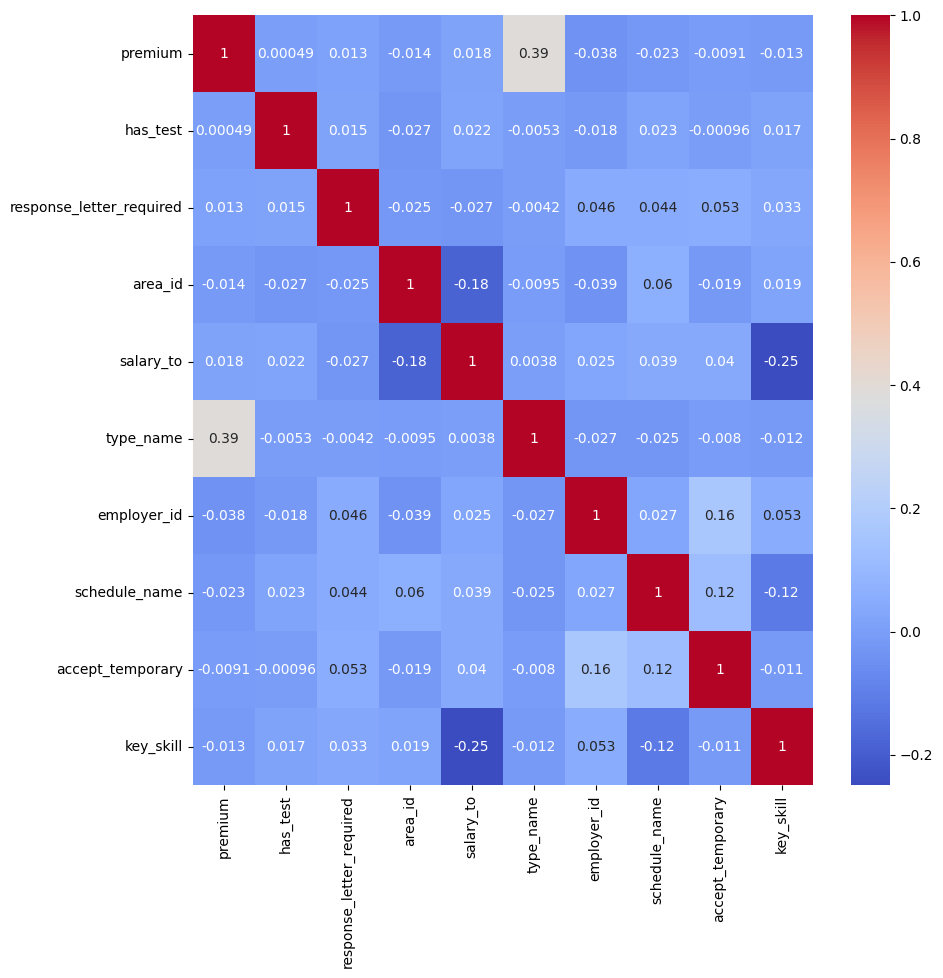

In [75]:
c = df.copy()
c.apply(le.fit_transform)
c['key_skill'] = le.fit_transform(c['key_skill'])
c['type_name'] = le.fit_transform(c['type_name'])
c['schedule_name'] = le.fit_transform(c['schedule_name'])
plt.figure(figsize=(10,10))
sns.heatmap(c.corr(), annot = True, cmap= 'coolwarm')

Особой корреляции между фичами не прослеживается.

<AxesSubplot: title={'center': 'Вакансии по количеству'}>

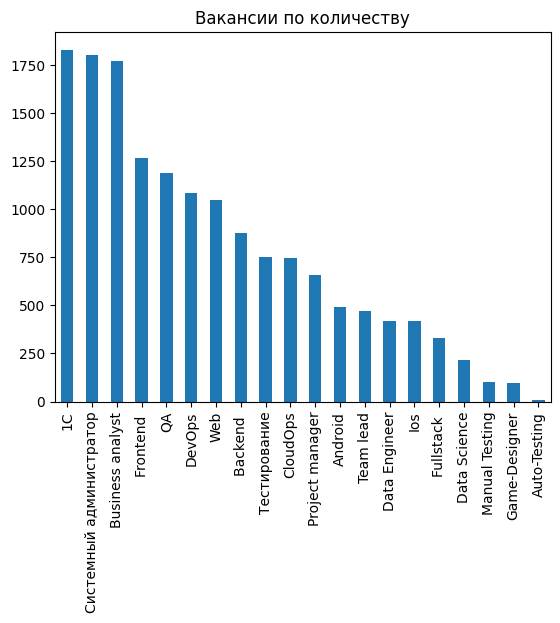

In [52]:
top_job = df['key_skill'].value_counts()
top_job.plot(kind="bar", title="Вакансии по количеству")

Количество вакансий 1C, сисадминов, бизнес аналитиков сильно больше остальных.

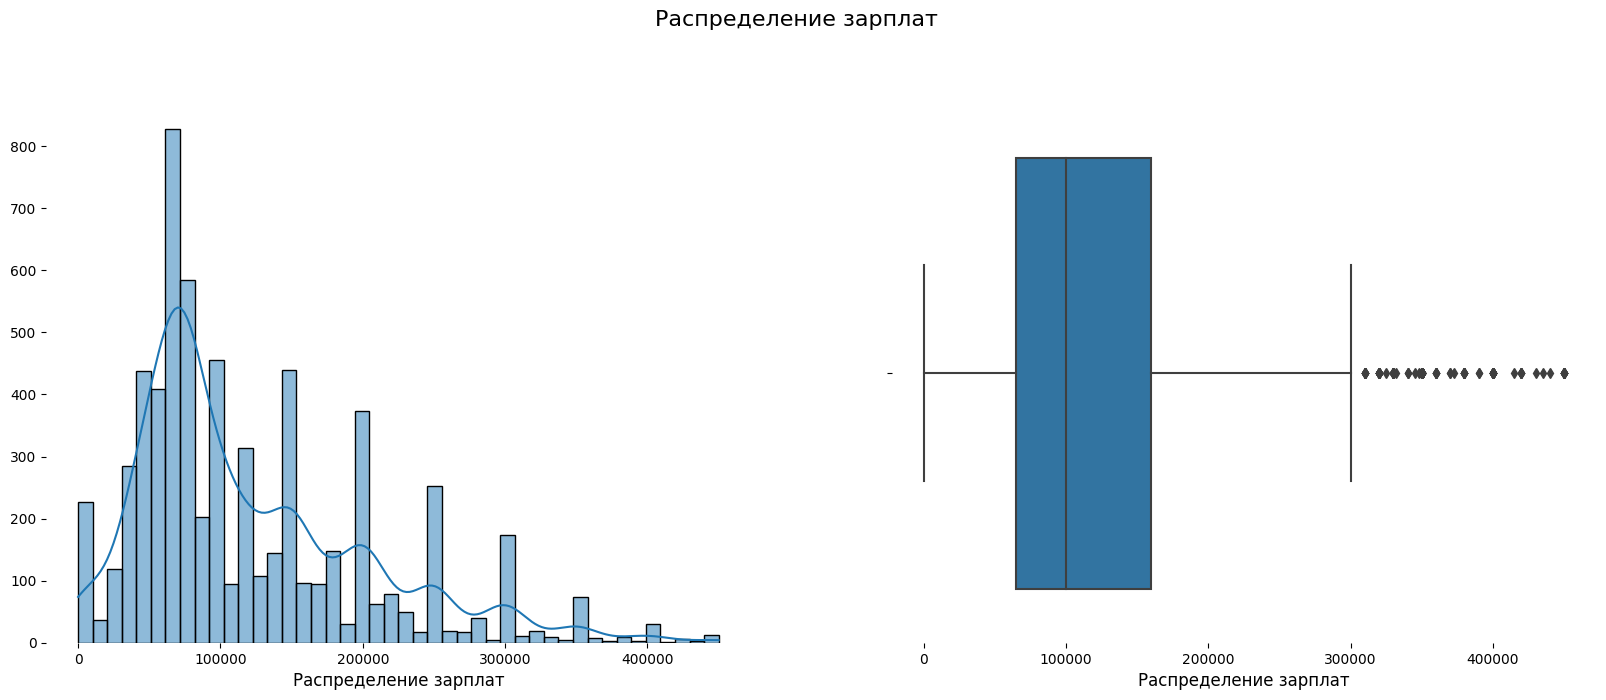

In [53]:
univariate_numerical_plot(x="salary_to", xlabel="Распределение зарплат")

Как можно видеть, большая часть вакансий имеет зарплату 60-70 тысяч рублей

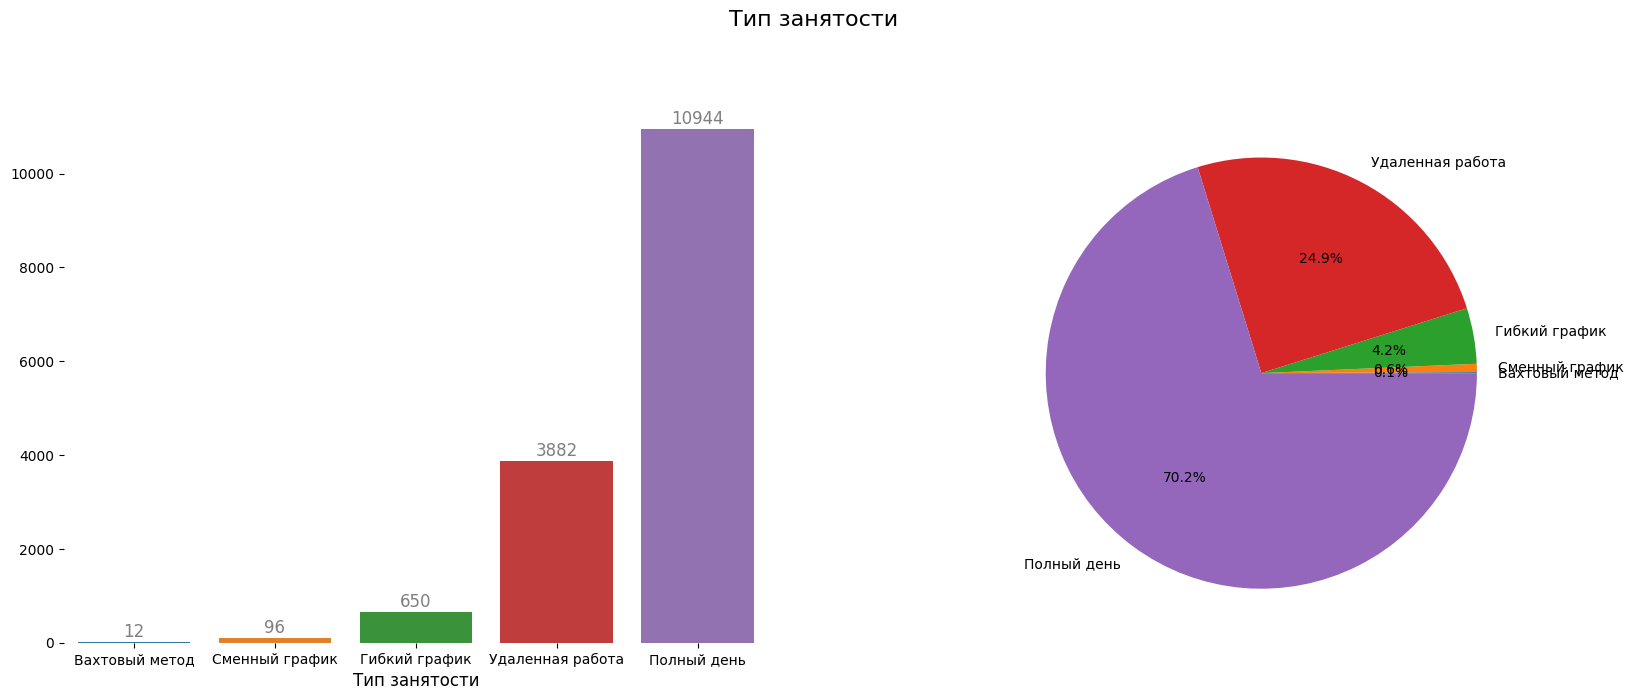

In [54]:
univariate_multi_plot(df=df, x="schedule_name", xlabel="Тип занятости")

Видно, что абсолютное большинство (70%) вакансий подразумевают полный рабочий день

In [55]:
cities = df.loc[(df['area_name'] == 'Москва') | (df['area_name'] == 'Санкт-Петербург') | (df['area_name'] == 'Новосибирск') | (df['area_name'] == 'Екатеринбург') | (df['area_name'] == 'Казань') | (df['area_name'] == 'Нижний Новгород') | (df['area_name'] == 'Краснодар') | (df['area_name'] == 'Ростов-на-Дону') | (df['area_name'] == 'Самара') | (df['area_name'] == 'Воронеж')]

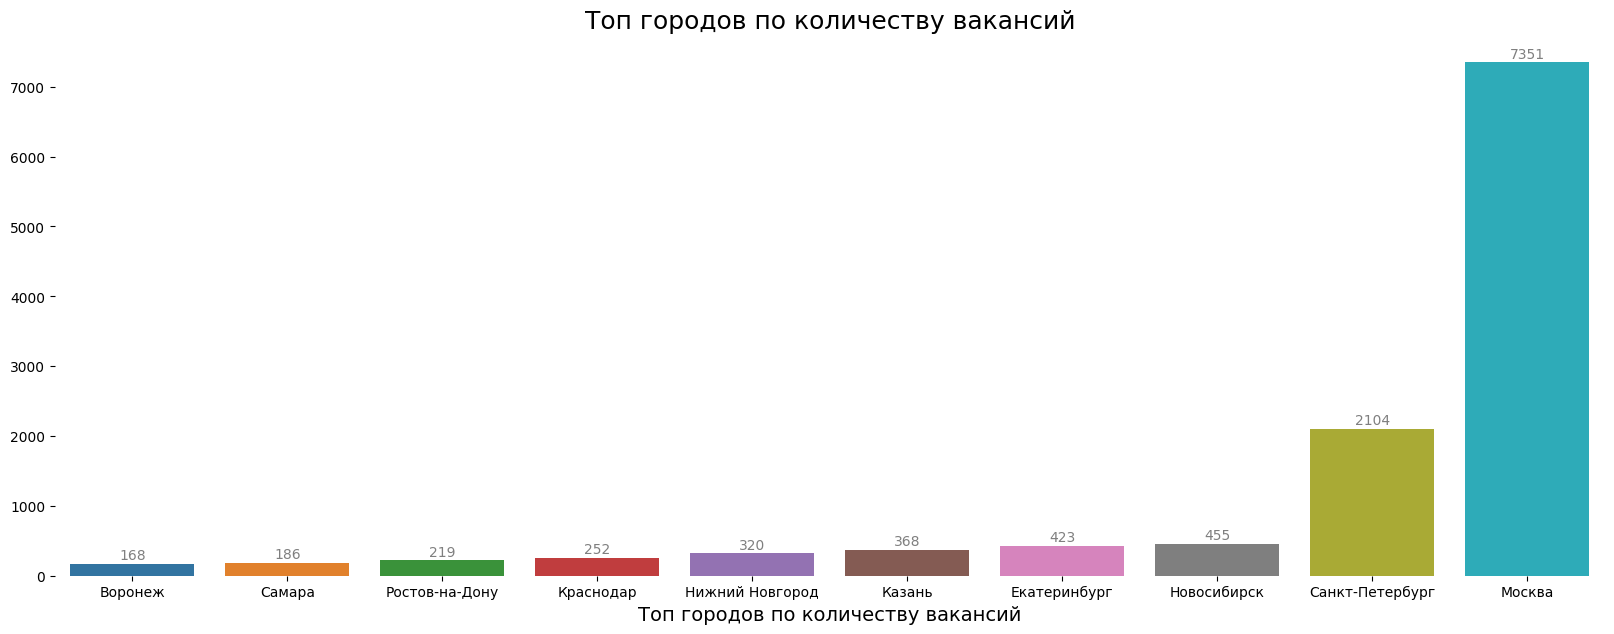

In [56]:
univariate_single_plot(df=cities,x="area_name", xlabel="Топ городов по количеству вакансий", bar_label=True)

Айти вакансий больше всего в больших городах, что неудивительно

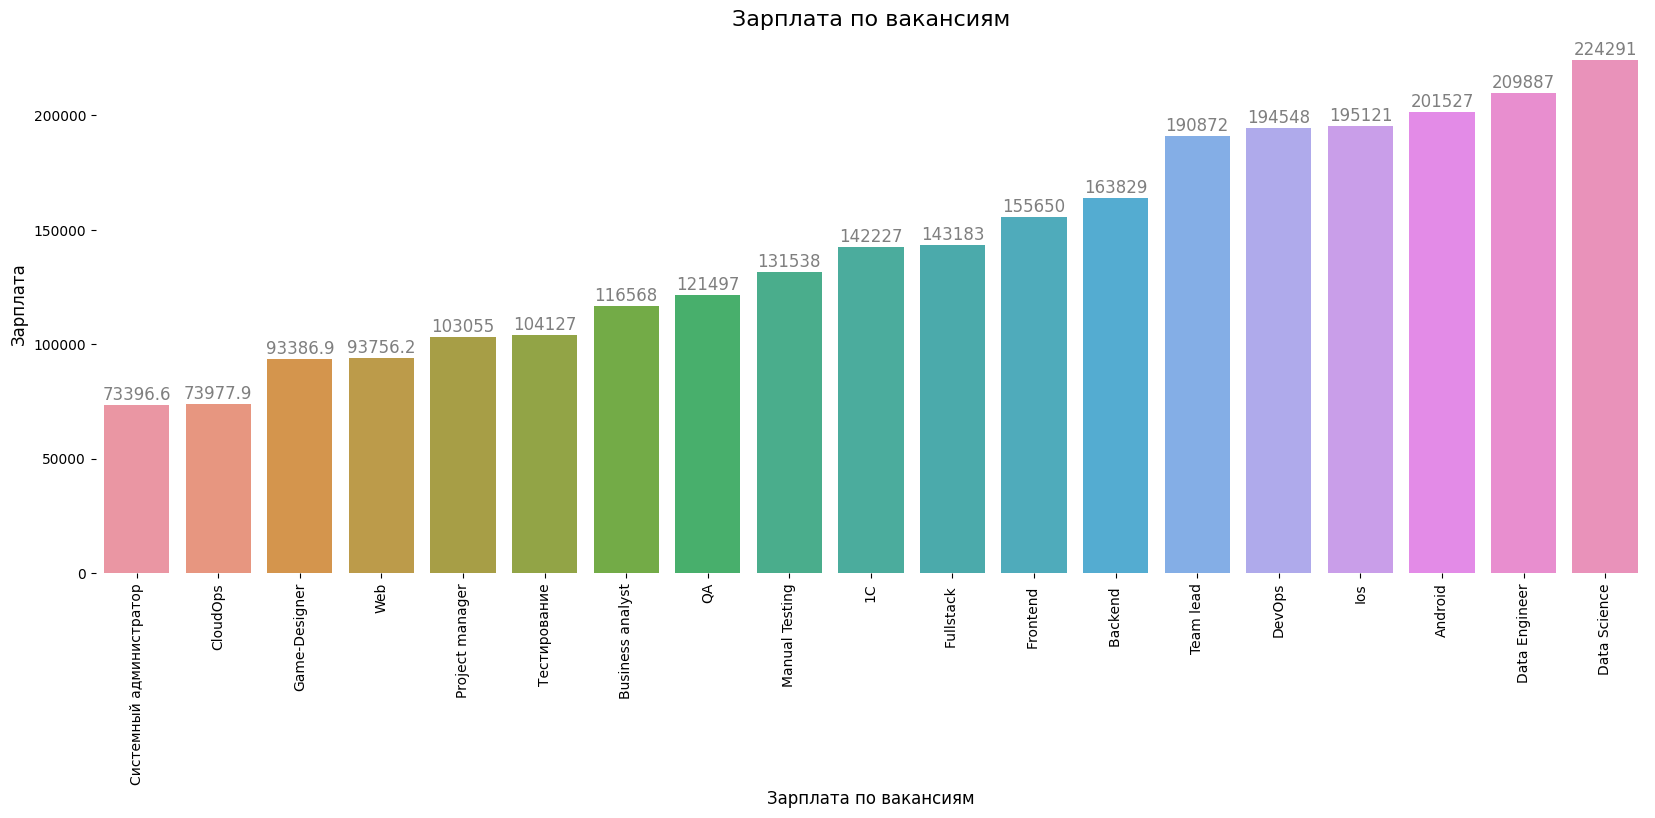

In [57]:
multivariate_plot(x="key_skill", xlabel="Зарплата по вакансиям",rotation=90)

Больше всего получают дата саентисты и дата инженеры, исходя из прошлых графиков фронтенд выглядит наиболее привлекательно, т.к. зарплата относительно высокая, а вакансий много

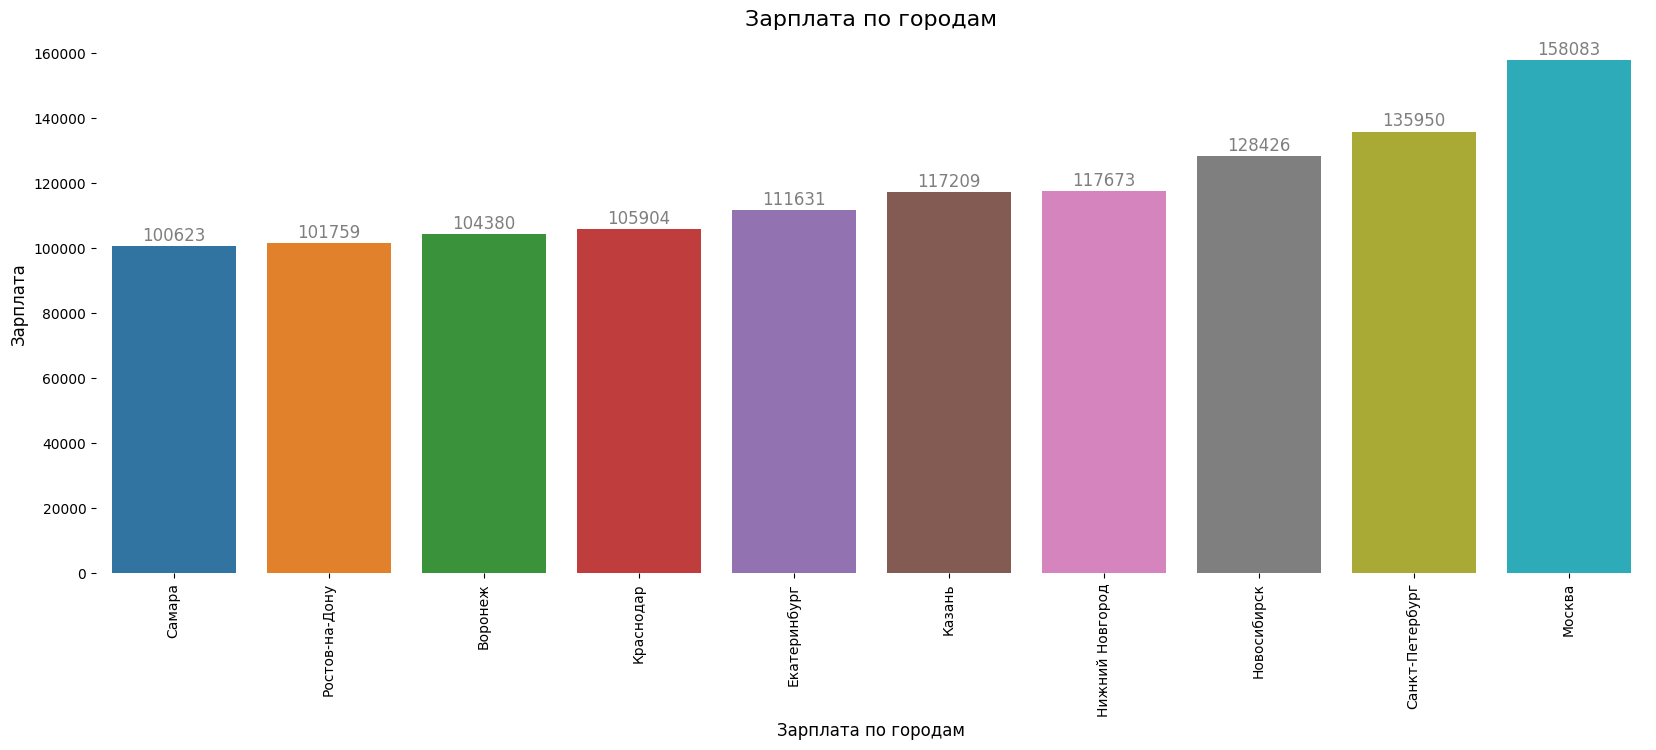

In [58]:
multivariate_plot(df=cities,x="area_name", xlabel="Зарплата по городам",rotation=90)

Больше всего получают айтишники в москве и петербурге

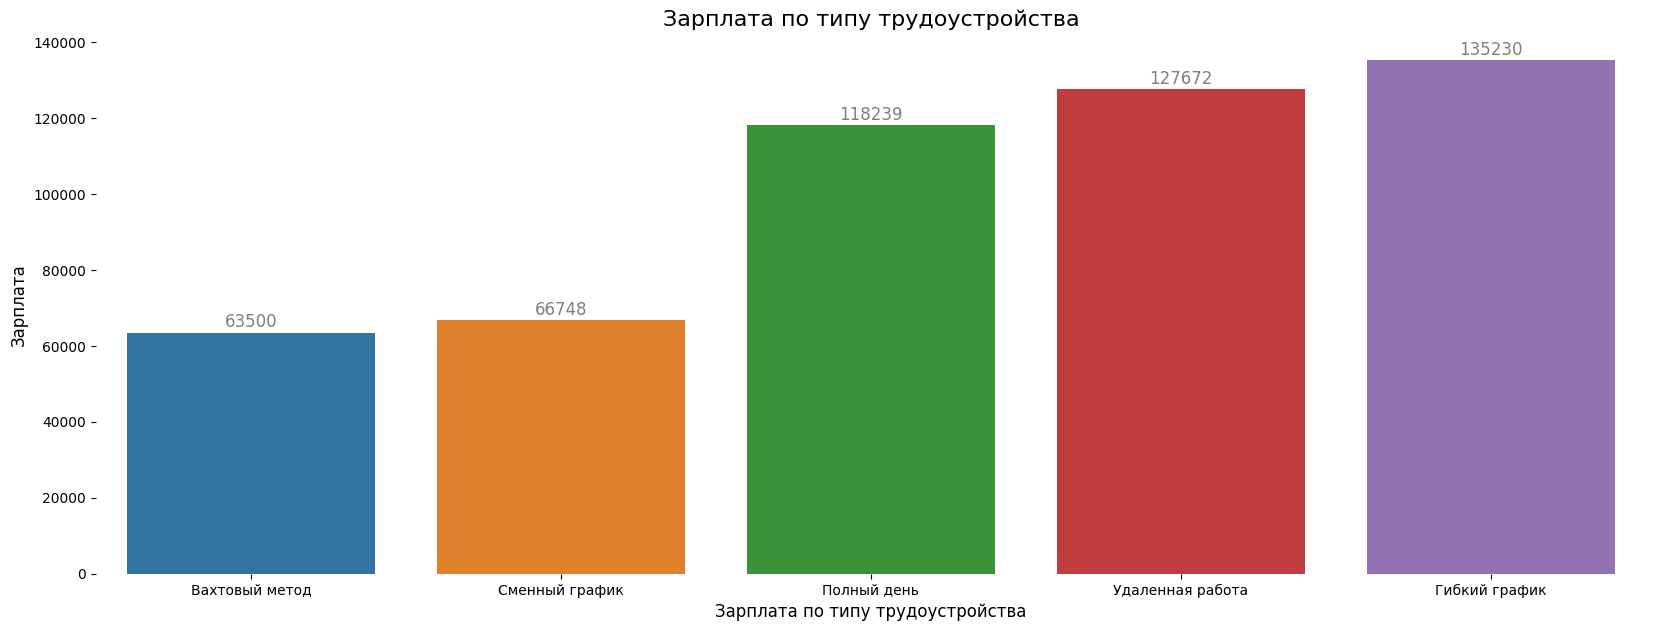

In [59]:
multivariate_plot(x="schedule_name", xlabel="Зарплата по типу трудоустройства")

На удивление, средняя зарплата людей с гибким графиком и на "удаленке" ощутимо выше людей на полном рабочем дне

In [129]:
df['employer_name'].value_counts().head(10)

Яндекс                      755
СБЕР                        523
Тинькофф                    297
VK                          164
МТС                         137
Иннотех, Группа компаний    119
Газпром нефть               105
МАГНИТ, Розничная сеть       80
IBS                          78
Промсвязьбанк                70
Name: employer_name, dtype: int64

Можно еще посмотреть зарплаты в зависимости от компании

In [130]:
employers = df.loc[(df['employer_name'] == 'Яндекс') | (df['employer_name'] == 'СБЕР') | (df['employer_name'] == 'Тинькофф') | (df['employer_name'] == 'VK') | (df['employer_name'] == 'МТС') | (df['employer_name'] == 'Иннотех, Группа компаний') | (df['employer_name'] == 'Газпром нефть') | (df['employer_name'] == 'МАГНИТ, Розничная сеть') | (df['employer_name'] == 'IBS') | (df['employer_name'] == 'Промсвязьбанк')]

In [143]:
employers.info()
employers = employers.dropna()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696 entries, 265 to 14006
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   premium                   696 non-null    bool   
 1   name                      696 non-null    object 
 2   has_test                  696 non-null    bool   
 3   response_letter_required  696 non-null    bool   
 4   area_id                   696 non-null    int64  
 5   area_name                 696 non-null    object 
 6   salary_to                 696 non-null    float64
 7   type_name                 696 non-null    object 
 8   employer_id               696 non-null    int64  
 9   employer_name             696 non-null    object 
 10  schedule_name             696 non-null    object 
 11  accept_temporary          696 non-null    bool   
 12  key_skill                 696 non-null    object 
dtypes: bool(4), float64(1), int64(2), object(6)
memory usage: 57.

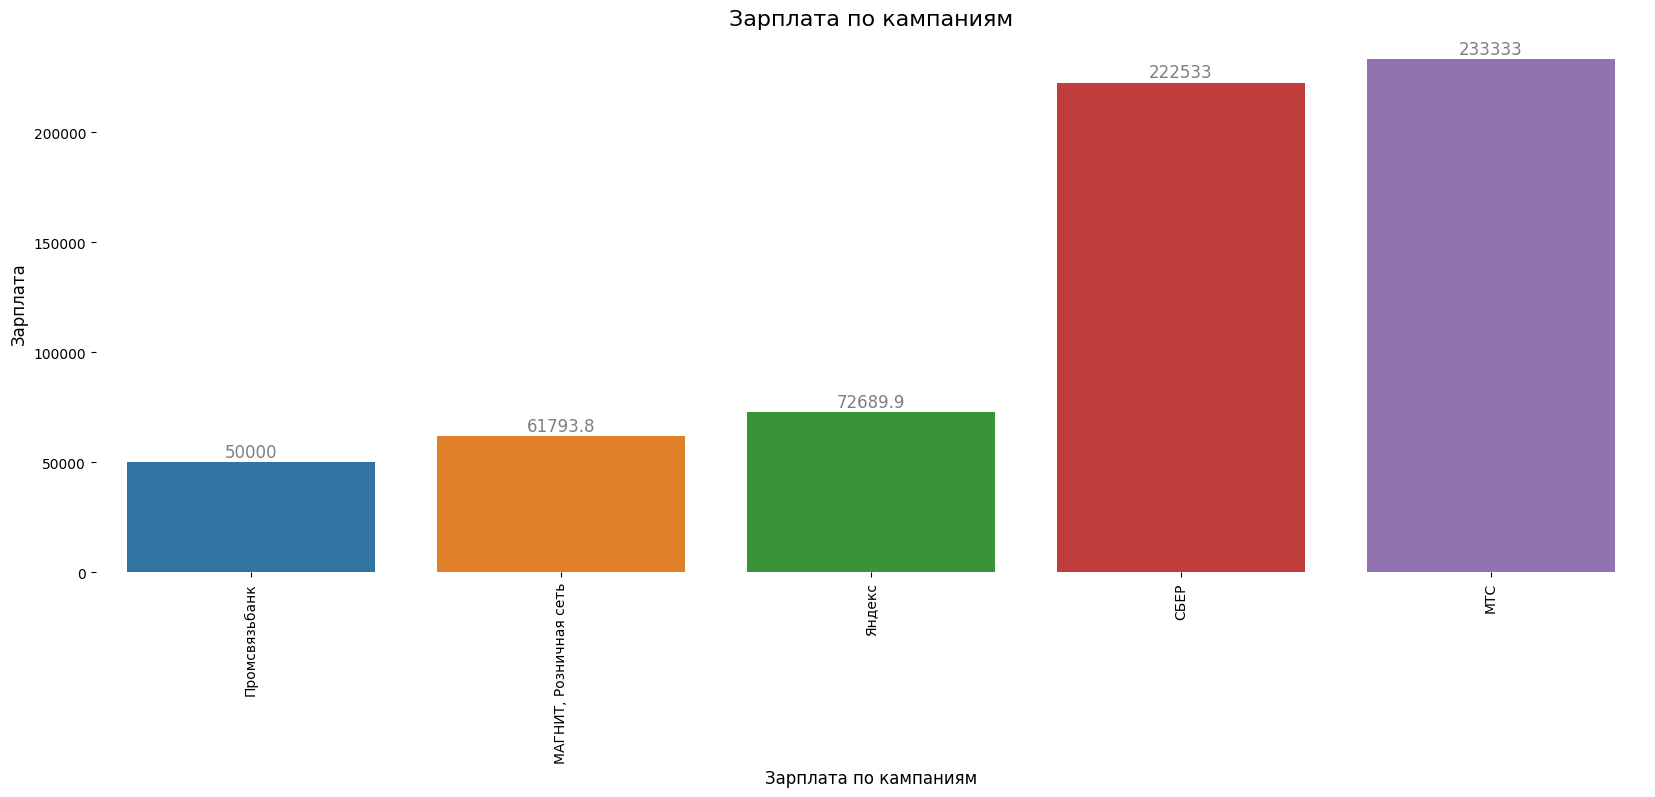

In [144]:
multivariate_plot(df=employers,x="employer_name", xlabel="Зарплата по кампаниям",rotation=90)

Из 10 самых больших (в плане количества вакансий) компаний, значения зарплат выставило только 5, СБЕР и МТС имеют огромный отрыв от Яндекса, Магнита и Промсвязьбанка, судя по тому, что из 2 тысяч вакансий пришлось выбросить 1600, большие компании не особо любят указывать ЗП в объявлениях)

# Попытаемся предсказать зарплату, решив задачу регрессии

In [100]:
X = c.copy()
X = X.drop(['name', 'area_name', 'employer_name'], axis=1)
X = X.dropna()
y = X.pop('salary_to') 
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6331 entries, 3 to 16602
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   premium                   6331 non-null   bool 
 1   has_test                  6331 non-null   bool 
 2   response_letter_required  6331 non-null   bool 
 3   area_id                   6331 non-null   int64
 4   type_name                 6331 non-null   int32
 5   employer_id               6331 non-null   int64
 6   schedule_name             6331 non-null   int32
 7   accept_temporary          6331 non-null   bool 
 8   key_skill                 6331 non-null   int32
dtypes: bool(4), int32(3), int64(2)
memory usage: 247.3 KB


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

In [102]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=1000, max_depth=7)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=7, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [108]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(y_test,xgb.predict(X_test)))

46243.739734866496


In [113]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_squared_error(y_test,xgb.predict(X_test)))

4685607743.708002


In [116]:
from sklearn.metrics import r2_score
r2_score(y_test, xgb.predict(X_test))

0.34430073890500346

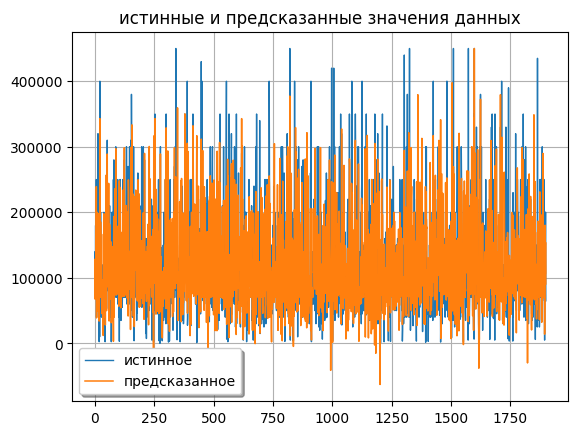

In [111]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="истинное")
plt.plot(x_ax, xgb.predict(X_test), linewidth=1.1, label="предсказанное")
plt.title("истинные и предсказанные значения данных")
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [119]:
from sklearn.linear_model import Ridge, RidgeCV
n_alphas = 1000
ridge_alphas = np.logspace(0.1, 200, n_alphas)
ridge_cv = RidgeCV(alphas=ridge_alphas, scoring="neg_mean_squared_error", cv=5)
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([1.25892541e+000, 1.99572225e+000, 3.16373574e+000, 5.01533908e+000,
       7.95060908e+000, 1.26037709e+001, 1.99802354e+001, 3.16738387e+001,
       5.02112231e+001, 7.95977700e+001, 1.26183044e+002, 2.00032748e+002,
       3.17103621e+002, 5.02691222e+002, 7.96895550e+002, 1.26328547e+003,
       2.00263408e+003, 3.17469276e+003, 5.03270880e+003, 7.97814457e+003,
       1.264742...
       1.57796766e+196, 2.50148670e+196, 3.96550314e+196, 6.28634770e+196,
       9.96548635e+196, 1.57978723e+197, 2.50437119e+197, 3.97007580e+197,
       6.29359655e+197, 9.97697764e+197, 1.58160890e+198, 2.50725900e+198,
       3.97465373e+198, 6.30085375e+198, 9.98848219e+198, 1.58343266e+199,
       2.51015015e+199, 3.97923694e+199, 6.30811933e+199, 1.00000000e+200]),
        cv=5, scoring='neg_mean_squared_error')

In [120]:
ridge_cv.alpha_

79.59777002314986

In [121]:
y_pred = ridge_cv.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

61258.07788347554


In [122]:
print(mean_squared_error(y_test, y_pred)) 

6460789042.606264


In [123]:
r2_score(y_test, y_pred)

0.09588364347906075

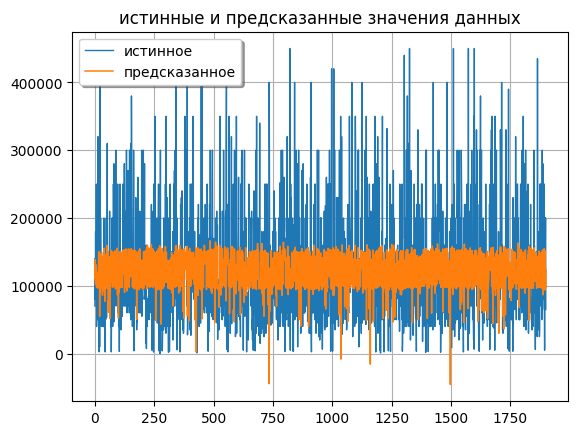

In [127]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="истинное")
plt.plot(x_ax, y_pred, linewidth=1.1, label="предсказанное")
plt.title("истинные и предсказанные значения данных")
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 